<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/%D0%9C%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_%D1%83%D1%80%D0%BE%D0%BA_5_%D0%94%D0%97_%D0%9A%D0%BE%D0%B6%D0%B5%D0%BC%D1%8F%D0%BA%D0%B8%D0%BD_%D0%92_%D0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройка





In [2]:
import numpy as np
from math import factorial
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
print('Настройка завершена')

Настройка завершена


# Задание № 1
Известно, что генеральная совокупность распределена нормально со средним квадратическим отклонением, равным 16. Найти доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочная средняя M = 80, а объем выборки n = 256.

## Решение
Так как $\sigma$ - СКО генеральной совокупности известно, то будет использовать $Z$ критерий.

Доверительный интервал определяется по следующей формуле:
$$\overline X \pm Z_{a/2}* \sigma / \sqrt n$$
где: $Z_{a/2} = 1,96$
$$80 \pm 1,96 * 16 /16 = [78; 82]$$ 

##Ответ
Доверительный интервал: [78;82]

In [6]:
z = norm.ppf(0.975)
sigma = 16
n = 256
M = 80
l = M - z * (sigma/(n**0.5))
r = M + z* (sigma/(n**0.5))
print('Доверительный интервал: [{:.3} ; {:.3}]'.format(l,r))

Доверительный интервал: [78.0 ; 82.0]


# Задание №3

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр $17$ мм.
Используя односторонний критерий с $α=0,05$, проверить эту гипотезу, если в выборке из $n=100$ шариков средний диаметр
оказался равным $17.5$ мм, а дисперсия известна и равна $4$ кв.мм.

##Решение

1. Сформулируем основную и альтернативную гипотезы

$$H_0: диаметр = 17, \mu = \mu_0$$
$$H_1: диаметр = 17,5, \mu > \mu_0$$ 




2. Так как известно СКО генеральной совокупности, то воспользуемся $Z$ критерием



3. Уровень значимости задан по задаче и равен $α=0,05$. 

4. Тогда табличное значение:
$$Z_t = 1,645 $$


5. Определим наблюдаемое значение по формуле:
$$Z_н = \frac {H_1 - H_0} {\sigma/\sqrt{n} } $$
$$Z_н = \frac {17.5 - 17.0} {0,2 } = 2,5 $$

Так как $Z_н > Z_t$ то гипотеза $H_0$ не верна. 

##Ответ
Гипотеза $H_0$ не верна


In [ ]:
h_0 = 17
h_1 = 17.5
zt =norm.ppf(0.95)
sig = 2/10
zn = (h_1 - h_0)/sig
if zn > zt: 
  print("Гипотеза H0 не верна")
else: 
  print("Гипотеза H0 верна")

Гипотеза H0 не верна


### Тут попытка в графики

График вроде правильный, но странно, что $y = 2$ при $x = 17$. [В интернетах пишут, что это не ошибка.](https://stackoverflow.com/questions/38141951/why-does-scipy-norm-pdf-sometimes-give-pdf-1-how-to-correct-it). Пока разбираться не стал для наглядности хватает и этого. 

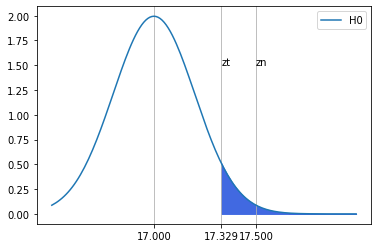

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Значения между 16.5 и 18 с шагом 0.01
x = np.arange(16.5, 18, 0.01)
# Нормальное расределение с М(x) = 17 СКО = 0,2

y = norm.pdf(x,17,sig) 
# Среднее значение = 17, СКО = 0.2.

ax.plot(x, y, label='H0')

sig_a = (x > 17 + zt * sig)
plt.fill_between(x, y, where=(sig_a), color='royalblue') 
xax = ax.xaxis   # или xax = ax.get_xaxis()
xax.set_ticks([17,17 + zt * sig, 17 + zn * sig])
xax.grid(True)
plt.text(17.329, 1.5, 'zt')
plt.text(17.5, 1.5, 'zn')

ax.legend()

plt.show()